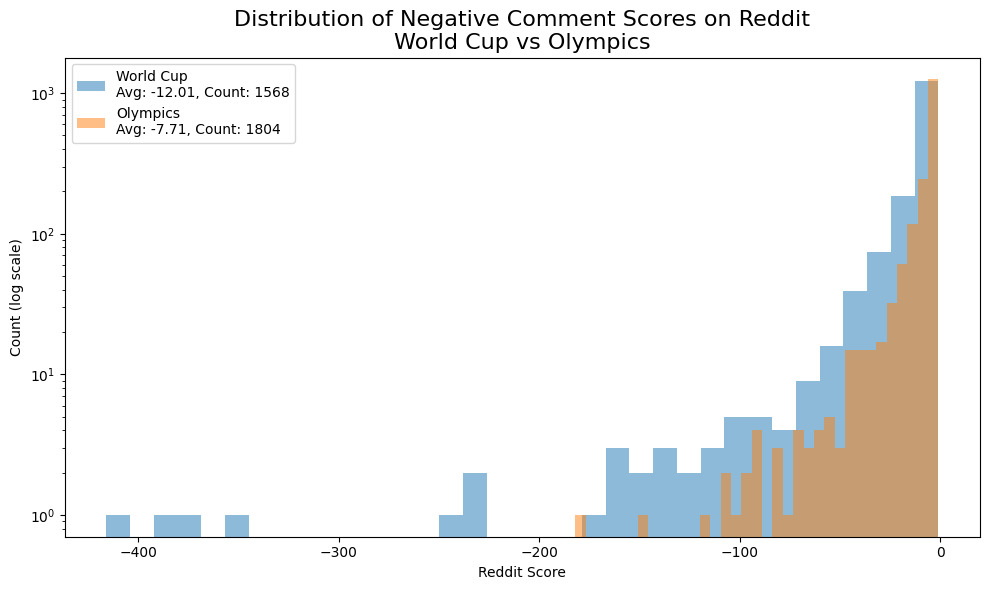

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("datasets/reddit_combined.csv")

neg = df[df["parent_id"].notna() & (df["score"] < 0)].copy()
neg["datetime"] = pd.to_datetime(neg["datetime"])
neg = neg[neg["datetime"] >= "2017-01-01"]

neg_olympics = neg[neg["event"] == "Olympics"]
neg_world_cup = neg[neg["event"] == "World Cup"]

wc_avg = neg_world_cup["score"].mean()
wc_count = neg_world_cup["score"].count()

olympics_avg = neg_olympics["score"].mean()
olympics_count = neg_olympics["score"].count()

plt.figure(figsize=(10, 6))

plt.hist(neg_world_cup["score"], alpha=0.5, label=f'World Cup\nAvg: {wc_avg:.2f}, Count: {wc_count}', bins=35)
plt.hist(neg_olympics["score"], alpha=0.5, label=f'Olympics\nAvg: {olympics_avg:.2f}, Count: {olympics_count}', bins=35)

plt.yscale('log')

plt.xlabel("Reddit Score")
plt.ylabel("Count (log scale)")

plt.title("Distribution of Negative Comment Scores on Reddit\nWorld Cup vs Olympics", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


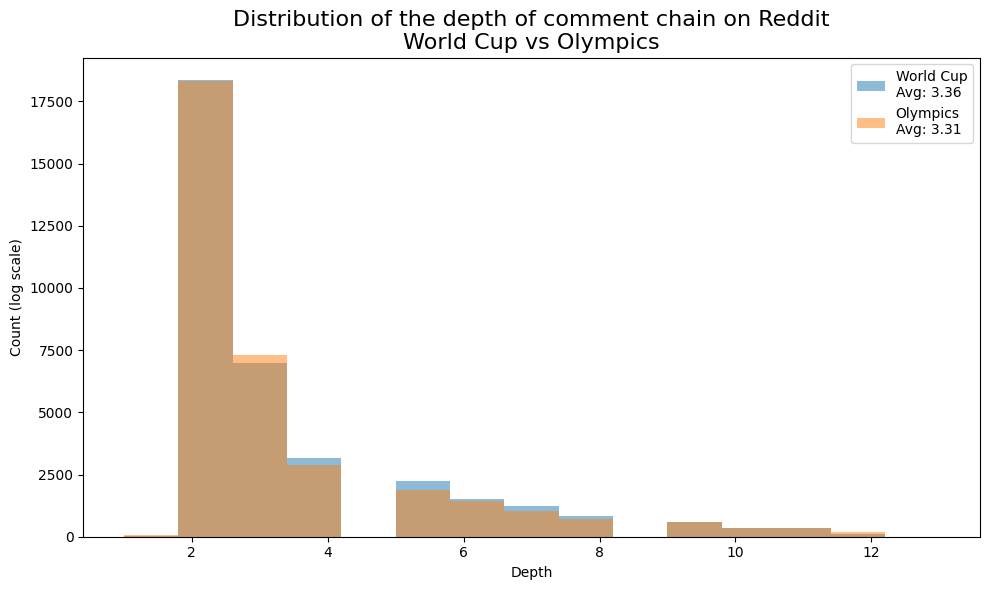

In [3]:
import pandas as pd

df = pd.read_csv("datasets/reddit_combined.csv")

df_olympics = df[df["event"] == "Olympics"].copy()
df_world_cup = df[df["event"] == "World Cup"].copy()

def get_depths(df):

    df["parent_id"] = df["parent_id"].astype(str).apply(lambda x: x.split("_")[-1])
    parent_lookup = df.set_index('id')['parent_id'].to_dict()
    leaf_ids = set(parent_lookup.keys()) - set(parent_lookup.values())
    
    depths = []

    for leaf_id in leaf_ids:
        depth = 0
        current = leaf_id
        while current in parent_lookup and pd.notna(parent_lookup[current]):
            current = parent_lookup[current]
            depth += 1
        depths.append(depth)
    
    return depths 

depth_olympics = get_depths(df_olympics)
depth_world_cup = get_depths(df_world_cup)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

wc_count = len(depth_world_cup)
wc_avg = sum(depth_world_cup) / wc_count

olympics_count = len(depth_olympics)
olympics_avg = sum(depth_olympics) / olympics_count

plt.hist(depth_world_cup, alpha=0.5, label=f'World Cup\nAvg: {wc_avg:.2f}', bins=15)
plt.hist(depth_olympics, alpha=0.5, label=f'Olympics\nAvg: {olympics_avg:.2f}', bins=15)

plt.xlabel("Depth")
plt.ylabel("Count (log scale)")

plt.title("Distribution of the depth of comment chain on Reddit\nWorld Cup vs Olympics", fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pandas import to_datetime

def vader(df:pd.DataFrame):

    vader_analyser = SentimentIntensityAnalyzer()

    datetime = []
    scores = []

    for i, v in df.iterrows():

        sentiment_score = vader_analyser.polarity_scores(v["text"])
        datetime.append(to_datetime(v["datetime"]))
        scores.append(sentiment_score['neg'])

    return datetime, scores

import pandas as pd

df = pd.read_csv("datasets/reddit_combined.csv")
df = df[~df["parent_id"].isna()]
df = df[~df["text"].isna()]
df = df[pd.to_datetime(df["datetime"]) >= pd.Timestamp("2017-07-01")]
df["datetime"] = pd.to_datetime(df["datetime"])

df

,id,parent_id,text,author,views,score,upvote_ratio,datetime,event,year
1,j0qjl9y,t3_zp43wc,The best final of all times?,2soccer2bot,NaN,1,1.0,2022-12-18 17:58:24,World Cup,2022
2,j0qjwse,t3_zp43wc,"This game will be talked about for decades, an...",Whereishumhum-,NaN,2716,2716.0,2022-12-18 18:00:11,World Cup,2022
3,j0r9oah,t1_j0qjwse,"It was incredible, reminded me of another cert...",Hist0racle,NaN,218,218.0,2022-12-18 20:40:25,World Cup,2022
4,j0san9w,t1_j0r9oah,You just had to go there 😂,Whereishumhum-,NaN,112,112.0,2022-12-19 01:03:33,World Cup,2022
5,j0sl9p5,t1_j0san9w,It's the only other final that comes to mind t...,Moshkown,NaN,27,27.0,2022-12-19 02:28:10,World Cup,2022
...,...,...,...,...,...,...,...,...,...,...
99642,h7oas50,t3_oxmiyb,What is this from?,Major_Tom_1969,NaN,5,5.0,2021-08-04 13:24:00,Olympics,2021
99643,h7nj53n,t3_oxmiyb,Worst episode. Worst year. Yeah…. I see it,dselwood05,NaN,14,14.0,2021-08-04 07:46:23,Olympics,2021
99644,h7qw88l,t3_oxmiyb,ive never seen a meme about fear her before,Revolutionary-Yam903,NaN,2,2.0,2021-08-05 00:38:33,Olympics,2021
99645,h7phtsi,t3_oxmiyb,"Erm...""Fear Her"" was made in 2006, and feature...",Yet_One_More_Idiot,NaN,1,1.0,2021-08-04 18:28:02,Olympics,2021


In [9]:
paris = df[df["year"] == 2024]
tokyo = df[df["year"] == 2021]
russia = df[df["year"] == 2018]
qatar = df[df["year"] == 2022]

paris_date, paris_score = vader(paris)
tokyo_date, tokyo_score = vader(tokyo)
russia_date, russia_score = vader(russia)
qatar_date, qatar_score = vader(qatar)

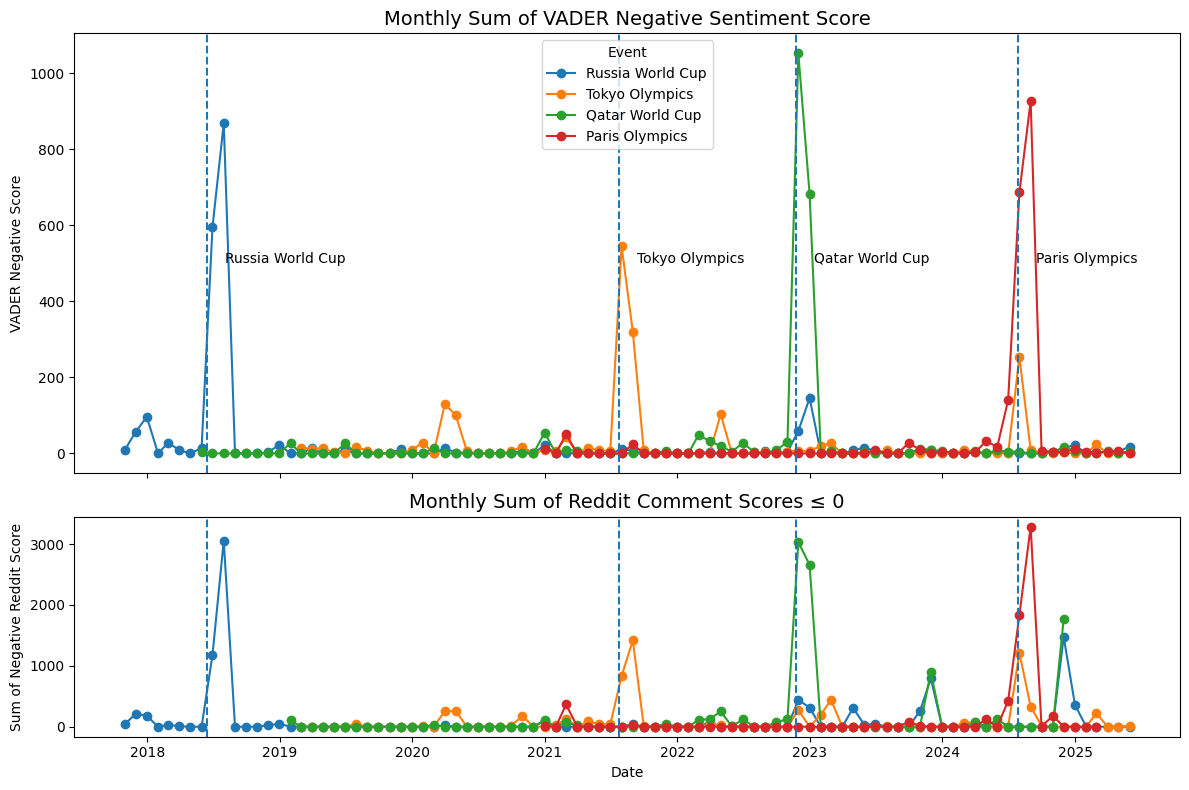

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, height_ratios=[2,1])

event_data = {
    "Russia World Cup": (russia_date, russia_score),
    "Tokyo Olympics": (tokyo_date, tokyo_score),
    "Qatar World Cup": (qatar_date, qatar_score),
    "Paris Olympics": (paris_date, paris_score)
}

for label, (dates, scores) in event_data.items():
    series = pd.Series(scores, index=pd.to_datetime(dates))
    monthly_sum = series.resample('ME').sum()
    axes[0].plot(monthly_sum.index, monthly_sum, marker='o', linestyle='-', label=label)

axes[0].set_title('Monthly Sum of VADER Negative Sentiment Score', fontsize=14)
axes[0].set_ylabel('VADER Negative Score')
axes[0].legend(title='Event')

neg = df[df["score"] <= 0].copy()
neg = neg[pd.to_datetime(neg["datetime"]) >= pd.Timestamp("2017-07-01")]
neg["datetime"] = pd.to_datetime(neg["datetime"])

years = [2018, 2021, 2022, 2024]
event_lookup = {
    2018: "Russia World Cup",
    2021: "Tokyo Olympics",
    2022: "Qatar World Cup",
    2024: "Paris Olympics",
}

for year in years:
    df_year = neg[neg['year'] == year]
    series = pd.Series(-df_year['score'].values, index=df_year['datetime'])
    monthly_sum = series.resample('ME').sum()
    axes[1].plot(monthly_sum.index, monthly_sum, marker='o', linestyle='-', label=event_lookup[year])

axes[1].set_title('Monthly Sum of Reddit Comment Scores ≤ 0', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sum of Negative Reddit Score')

event_dates = {
    'Paris Olympics': pd.Timestamp('2024-07-26'),
    'Tokyo Olympics': pd.Timestamp('2021-07-23'),
    'Russia World Cup': pd.Timestamp('2018-06-14'),
    'Qatar World Cup': pd.Timestamp('2022-11-23'),
}

for event, date in event_dates.items():
    axes[0].axvline(x=date, linestyle='--')
    axes[1].axvline(x=date, linestyle='--')
    axes[0].text(date + pd.Timedelta(days=50), 500, event, fontsize=10)

plt.tight_layout()
plt.show()